State vectors u, v and w have been defined.
{np.str_('0'): np.int64(546), np.str_('1'): np.int64(454)}


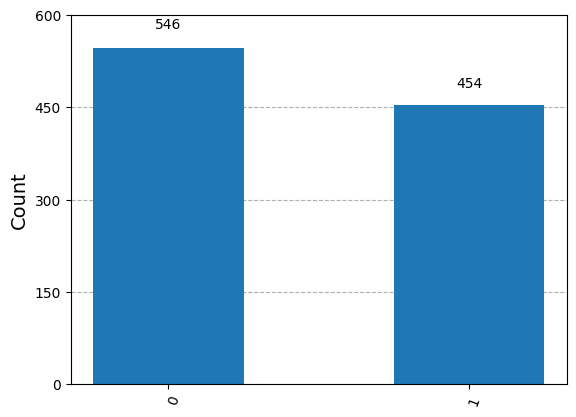

In [1]:
"""
Objective: learning qiskit
Author: https://github.com/osevas
Date: 2024-08-18
Reference: https://github.com/osevas/qiskit_training
Environment activation: 
C:\\Users\\oseva\\Documents\\py_envs\\qiskit_env\\Scripts\\activate
version: 0.0.1
"""

from numpy import array, matmul, sqrt
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

ket0 = array([1, 0])
ket1 = array([0, 1])

# print(ket0.shape)
# print(ket0 / 2 + ket1 / 2)

M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

# print(M1 / 2 + M2 / 2)

# print(matmul(M1, ket1))
# print(matmul(M1, M2))
# print(matmul(M2, M1))

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print('State vectors u, v and w have been defined.')

# print(u.draw('latex'))
# print(v.draw('text'))

# print(u.is_valid())
# print(v.is_valid())
# print(w.is_valid())

# print(v.measure())

statistics = v.sample_counts(1000)
print(statistics)
plot_histogram(statistics)


In [7]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
display(v.draw("latex"))
display(v.draw("text"))

v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("latex")

<IPython.core.display.Latex object>

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

In [8]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [9]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

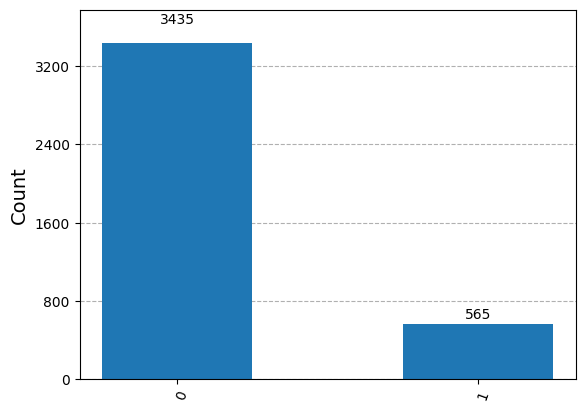

In [10]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)